In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns',None)
pd.set_option('max_rows',None)
t_total = time.perf_counter()

In [2]:
col_list = ["Post","Data","Categoria","Área","Mídia","SEO","Links I.","Links E.",
            "Complexidade","Introdução","Analogias","Interação","Siglas","Visualizações"]

df = pd.read_excel("dataset-pgc-manual.xlsx", usecols=col_list)

df2 = pd.read_excel("dataset-pln.xlsx")

df = df.join(df2)

print(df.head(5))

                                                Post       Data  \
0           Livro – Professor, para que estudo isso? 2018-06-06   
1                             Coleção Contém Química 2018-06-14   
2  O que é um podcast? É tipo rádio? Como faço pa... 2018-06-15   
3                               Nojo no mundo animal 2018-06-18   
4  Prêmio Nobel 2017 – Microscopia Eletrônica com... 2018-07-16   

        Categoria        Área  Mídia  SEO  Links I.  Links E.  Complexidade  \
0  ABC da ciência     Ciência      1    0         0         2             1   
1  ABC da ciência     Química      2    1         0         3             1   
2          Outros  Tecnologia      7    1         0        28             2   
3      Sci… what?    Biologia      1    1         0         3             2   
4      Sci… what?     Química      1    1         0         0             3   

   Introdução  Analogias  Interação  Siglas  Visualizações  numPal  numPar  \
0           1          0          1       1 

In [3]:
import datetime
#dt = datetime.datetime.today()
dt = datetime.datetime(year=2020,month=3,day=1, hour=0, minute=0, second=0, microsecond=0, tzinfo=None, fold=0)
print(dt)
# 2020-03-01 00:00:00

dias = []

for i in range(df['Data'].size):
    dias.append((dt-df['Data'][i]).days)

print(dias)
df['Dias'] = dias
df.drop('Data',axis=1,inplace=True)

2020-03-01 00:00:00
[634, 626, 625, 622, 594, 592, 589, 587, 585, 584, 583, 582, 580, 578, 575, 573, 571, 568, 566, 563, 559, 556, 552, 549, 545, 542, 538, 535, 531, 528, 524, 521, 517, 514, 510, 507, 503, 500, 496, 493, 492, 489, 486, 482, 472, 468, 461, 454, 432, 426, 426, 419, 412, 405, 398, 391, 384, 377, 370, 356, 349, 345, 342, 336, 330, 328, 321, 318, 314, 307, 304, 300, 294, 286, 279, 272, 265, 258, 252, 246, 244, 237, 230, 225, 223, 216, 209, 202, 195, 188, 181, 174, 167, 160, 153, 146, 143, 139, 132, 125, 118, 111, 104, 97, 90, 83, 76, 69, 62, 61, 55, 48, 41, 34, 27, 20, 13, 6]


In [4]:
# Mostrando quantos textos tem de cada Categoria
df.groupby('Categoria').count()[['Post']].sort_values(by=['Post'], ascending=0)

,Post
Categoria,
Ciência ao redor,43
O que que a ciência tem?,36
Profissão Cientista,13
Sci… what?,7
Ciência Pop,6
Outros,6
ABC da ciência,4
Você disse ciência?,3


In [5]:
# Mostrando quantos textos tem de cada Área

df.groupby('Área').count()[['Post']].sort_values(by=['Post'], ascending=0)

,Post
Área,
Ciência,22
Química,20
Biologia,18
Física,17
História,11
Medicina,10
Astronomia,7
Matemática,5
Psicologia,4


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

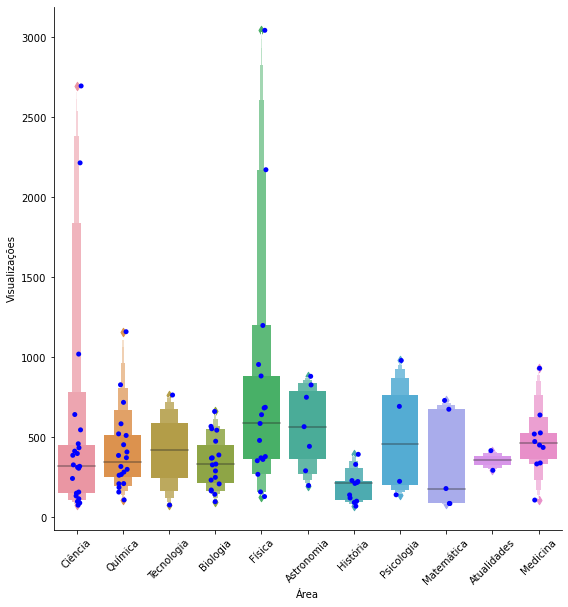

In [6]:
sns.catplot(x='Área', y='Visualizações', kind='boxen', data=df, height=8)
sns.stripplot(x="Área", y="Visualizações", data=df, color="blue");
plt.xticks(rotation=45)

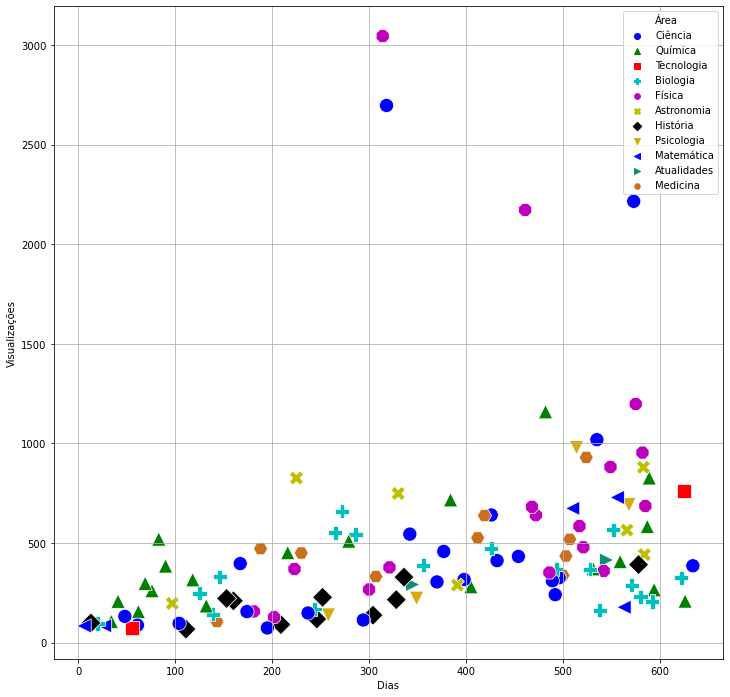

In [7]:
plt.subplots(figsize=(12, 12))
blue_red = ["b","g","r","c","m","y","k","#D4AC0D","#0000FF","#138D75","#CA6F1E"];
colors = sns.color_palette(blue_red);
mk = ["o","^","s","P","8","X","D","v","<",">","H"]
plt.grid()
sns.scatterplot(x='Dias', y='Visualizações', hue='Área', style='Área', markers=mk, data=df, palette=colors, s=200)

In [8]:
df

,Post,Categoria,Área,Mídia,SEO,Links I.,Links E.,Complexidade,Introdução,Analogias,Interação,Siglas,Visualizações,numPal,numPar,numSub,numAdj,numVrb,numNEs,numDet,numConj,numAdv,numAdp,numNum,Pergunta,tamParagraf,tamTitulo,Dias
0,"Livro – Professor, para que estudo isso?",ABC da ciência,Ciência,1,0,0,2,1,1,0,1,1,386,345,9,137,30,41,47,39,11,15,49,4,1,308,40,634
1,Coleção Contém Química,ABC da ciência,Química,2,1,0,3,1,1,0,1,0,209,532,18,223,37,60,79,66,23,13,84,8,0,204,22,626
2,O que é um podcast? É tipo rádio? Como faço pa...,Outros,Tecnologia,7,1,0,28,2,1,1,1,0,763,913,33,322,42,152,109,118,29,53,132,16,1,180,65,625
3,Nojo no mundo animal,Sci… what?,Biologia,1,1,0,3,2,1,1,1,0,326,322,6,120,20,43,20,37,14,10,58,4,0,514,20,622
4,Prêmio Nobel 2017 – Microscopia Eletrônica com...,Sci… what?,Química,1,1,0,0,3,0,0,0,1,266,557,13,227,40,55,86,69,18,20,107,14,0,340,56,594
5,Que seja eterno enquanto dure…,Sci… what?,Biologia,1,1,0,8,2,1,1,1,0,207,400,9,116,25,53,27,51,7,21,58,17,0,332,32,592
6,O que dá cor aos fogos de artifício?,Ciência ao redor,Química,1,1,0,3,3,1,0,1,1,827,400,7,142,26,56,21,51,15,15,65,0,1,472,36,589
7,Por que café descafeinado tem gosto e aroma de...,O que que a ciência tem?,Química,1,1,0,7,3,0,0,0,1,583,345,7,103,14,54,11,51,12,16,56,7,1,384,52,587
8,Arco-íris de sons? O que seria?,O que que a ciência tem?,Física,1,0,0,0,3,1,1,1,0,686,577,9,185,25,86,13,93,15,35,95,0,1,478,31,585
9,[ENTREVISTA] Água em Marte: os próximos passos...,Profissão Cientista,Astronomia,2,1,0,1,2,1,0,1,0,442,1129,20,382,70,140,123,149,22,72,184,7,0,378,71,584


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Post           118 non-null    object
 1   Categoria      118 non-null    object
 2   Área           118 non-null    object
 3   Mídia          118 non-null    int64 
 4   SEO            118 non-null    int64 
 5   Links I.       118 non-null    int64 
 6   Links E.       118 non-null    int64 
 7   Complexidade   118 non-null    int64 
 8   Introdução     118 non-null    int64 
 9   Analogias      118 non-null    int64 
 10  Interação      118 non-null    int64 
 11  Siglas         118 non-null    int64 
 12  Visualizações  118 non-null    int64 
 13  numPal         118 non-null    int64 
 14  numPar         118 non-null    int64 
 15  numSub         118 non-null    int64 
 16  numAdj         118 non-null    int64 
 17  numVrb         118 non-null    int64 
 18  numNEs         118 non-null   

In [10]:
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title='Relatório PGC - Pandas Profiling', html={'style':{'full_width':True}})
#profile.to_file(output_file="Relatorio_PGC.html")

In [11]:
df.drop('Post',axis=1,inplace=True)

In [12]:
params = {'figure.figsize': [10,10],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)

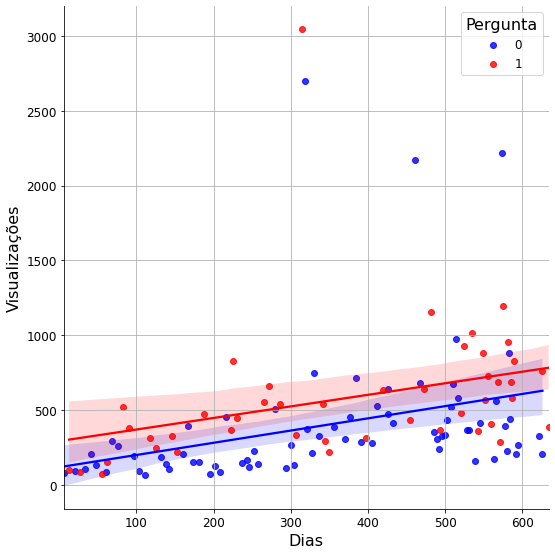

In [13]:
blue_red = ["#0000FF", "#FF0000"];
colors = sns.color_palette(blue_red);
sns.lmplot(x='Dias', y='Visualizações', hue='Pergunta', data=df, palette=colors, height=8, legend_out=False, truncate=True)
plt.grid()

In [14]:
def colorRedBlue(answer):
    colors=[]
    for a in answer:
        if a==1:
            colors.append('red')
        else:
            colors.append('blue')
    return colors

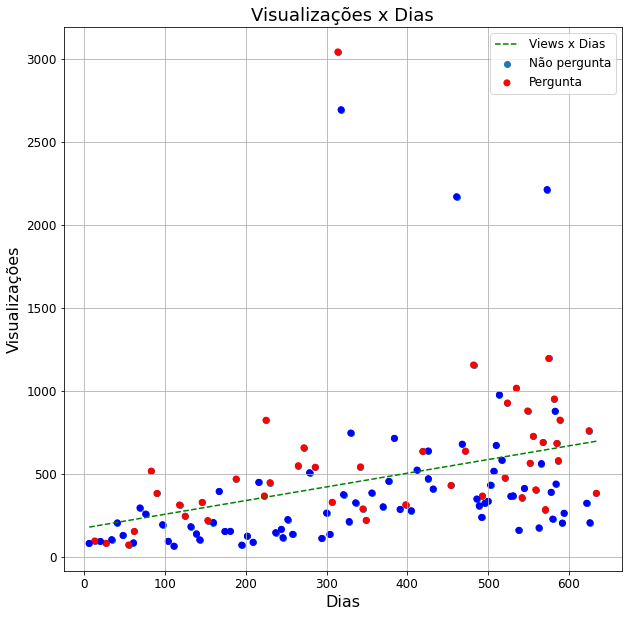

In [15]:
x = df['Dias']
y = df['Visualizações']
cols=colorRedBlue(df['Pergunta'])
plt.scatter(x,y)
plt.title('Visualizações x Dias')
plt.xlabel('Dias')
#plt.gca().invert_xaxis()
plt.ylabel('Visualizações')
plt.scatter(x=x,y=y,c=cols)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"g--")
plt.legend(('Views x Dias','Não pergunta','Pergunta'))
plt.grid()
plt.show()

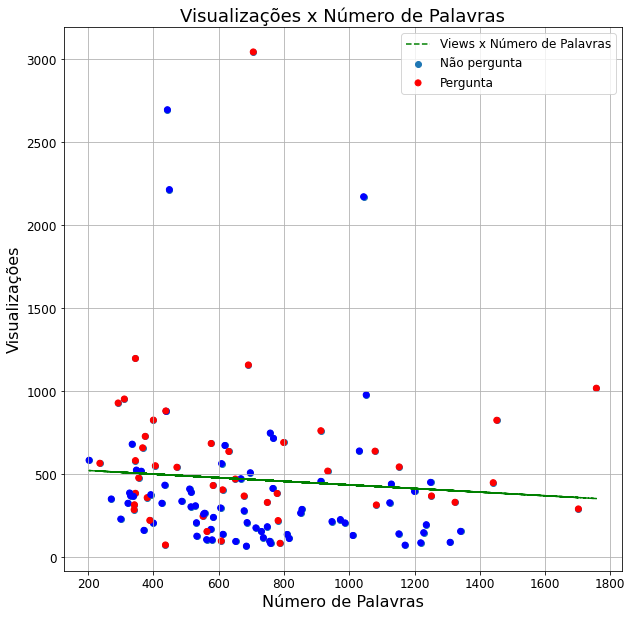

In [16]:
x = df['numPal']
y = df['Visualizações']
plt.scatter(x,y)
plt.title('Visualizações x Número de Palavras')
plt.xlabel('Número de Palavras')
#plt.gca().invert_xaxis()
plt.ylabel('Visualizações')
plt.scatter(x=x,y=y,c=cols)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"g--")
plt.legend(('Views x Número de Palavras','Não pergunta','Pergunta'))
plt.grid()
plt.show()

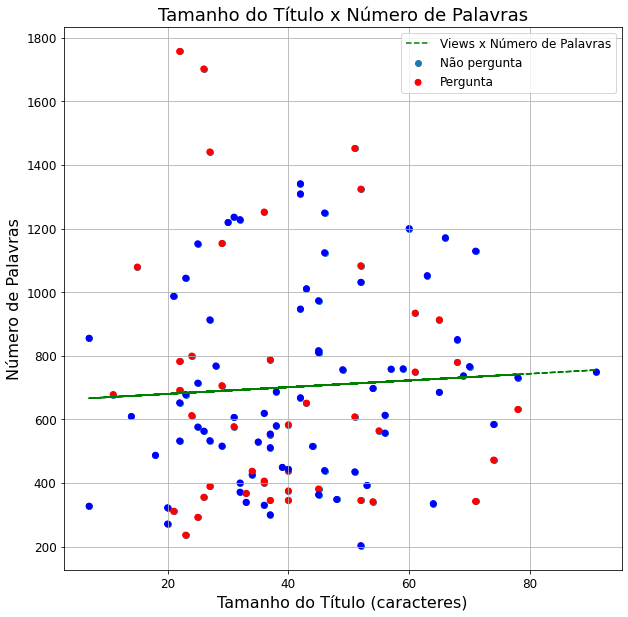

In [17]:
y = df['numPal']
x = df['tamTitulo']
plt.scatter(x,y)
plt.title('Tamanho do Título x Número de Palavras')
plt.ylabel('Número de Palavras')
#plt.gca().invert_xaxis()
plt.xlabel('Tamanho do Título (caracteres)')
plt.scatter(x=x,y=y,c=cols)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"g--")
plt.legend(('Views x Número de Palavras','Não pergunta','Pergunta'))
plt.grid()
plt.show()

In [18]:
df2 = df[['Pergunta','Visualizações']].copy()

pergunta = []
nopergunta = []

for i in range(118):
    if df2.iloc[i]['Pergunta'] == 0:
        nopergunta.append(df2.iloc[i]['Visualizações'])
    else:
        pergunta.append(df2.iloc[i]['Visualizações'])

In [19]:
print(pergunta)
print(nopergunta)

[386, 763, 827, 583, 686, 954, 1198, 288, 692, 407, 729, 567, 882, 360, 1019, 930, 479, 370, 1159, 640, 433, 638, 317, 223, 292, 545, 3044, 332, 543, 660, 552, 450, 826, 370, 472, 222, 331, 248, 316, 385, 520, 156, 75, 85, 99]
[209, 326, 266, 207, 442, 880, 231, 392, 2215, 565, 178, 415, 163, 371, 368, 585, 979, 674, 519, 435, 338, 326, 241, 311, 352, 682, 2172, 412, 474, 641, 526, 281, 289, 717, 458, 305, 388, 329, 749, 216, 378, 2696, 138, 267, 114, 510, 139, 228, 119, 169, 149, 452, 91, 128, 74, 157, 156, 397, 210, 106, 142, 185, 68, 97, 197, 261, 298, 88, 132, 208, 107, 96, 84]


In [20]:
import statistics

x = statistics.mean(pergunta)
y = statistics.mean(nopergunta)
print(f"Média\nPergunta: {x}\t\tNão-pergunta: {y}\n")

x = statistics.median(pergunta)
y = statistics.median(nopergunta)
print(f"Mediana\nPergunta: {x}\t\tNão-pergunta: {y}\n")

x = statistics.mode(pergunta)
y = statistics.mode(nopergunta)
print(f"Moda\nPergunta: {x}\t\tNão-pergunta: {y}\n")

x = statistics.stdev(pergunta)
y = statistics.stdev(nopergunta)
print(f"Desvio Padrão\nPergunta: {round(x,2)}\tNão-pergunta: {round(y,2)}\n")

x = len(pergunta)
y = len(nopergunta)
print(f"Quantidade\nPergunta: {x}\t\tNão-pergunta: {y}\n")

Média
Pergunta: 578		Não-pergunta: 400

Mediana
Pergunta: 479		Não-pergunta: 289

Moda
Pergunta: 370		Não-pergunta: 326

Desvio Padrão
Pergunta: 466.28	Não-pergunta: 456.83

Quantidade
Pergunta: 45		Não-pergunta: 73



In [21]:
# Retirando outliers

df.drop(df[df.Visualizações > 2000].index, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

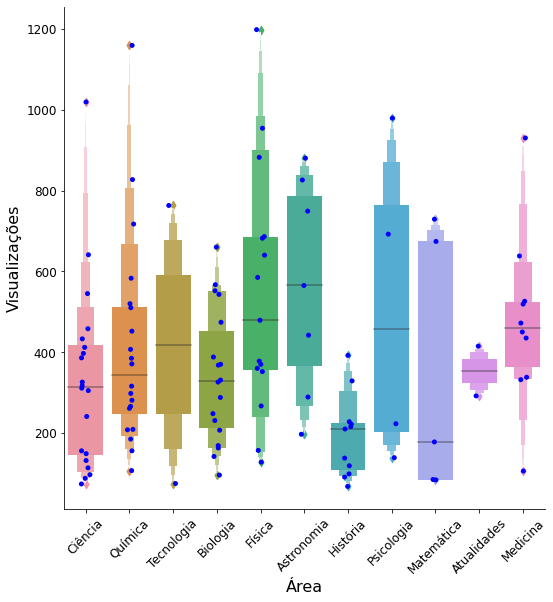

In [22]:
sns.catplot(x='Área', y='Visualizações', kind='boxen', data=df, height=8)
sns.stripplot(x="Área", y="Visualizações", data=df, color="blue");
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

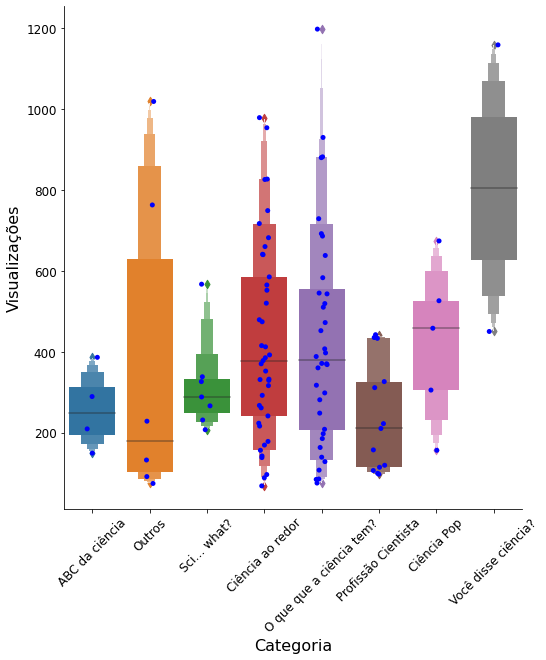

In [23]:
sns.catplot(x='Categoria', y='Visualizações', kind='boxen', data=df, height=8)
sns.stripplot(x="Categoria", y="Visualizações", data=df, color="blue");
plt.xticks(rotation=45)

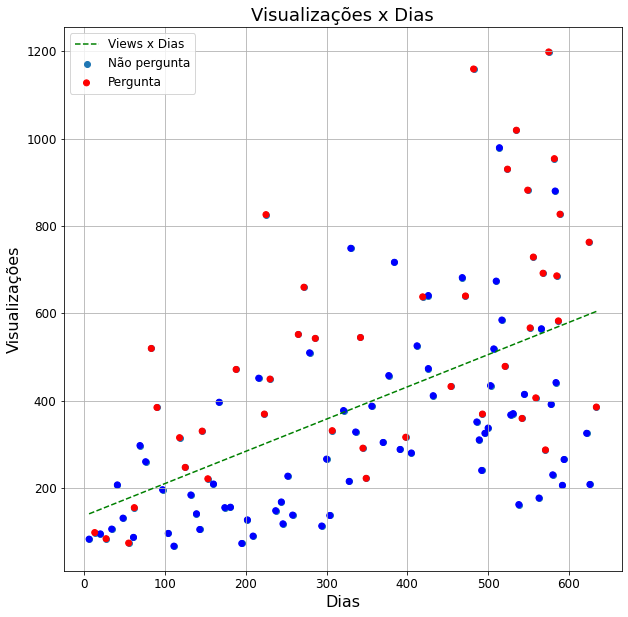

In [24]:
x = df['Dias']
y = df['Visualizações']
plt.scatter(x,y)
plt.title('Visualizações x Dias')
plt.xlabel('Dias')
#plt.gca().invert_xaxis()
plt.ylabel('Visualizações')
cols=colorRedBlue(df['Pergunta'])
plt.scatter(x=x,y=y,c=cols)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"g--")
plt.legend(('Views x Dias','Não pergunta','Pergunta'))
plt.grid()
plt.show()

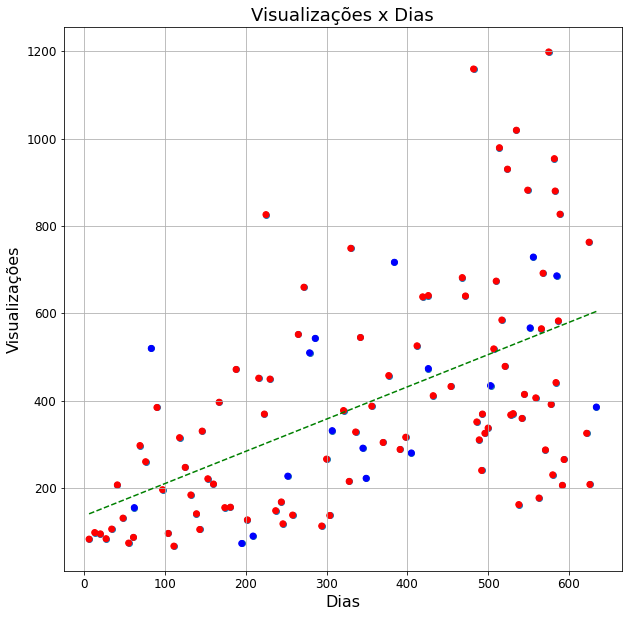

In [25]:
x = df['Dias']
y = df['Visualizações']
plt.scatter(x,y)
plt.title('Visualizações x Dias')
plt.xlabel('Dias')
plt.ylabel('Visualizações')
cols=colorRedBlue(df['SEO'])
plt.scatter(x=x,y=y,c=cols)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"g--")
plt.grid()
plt.show()

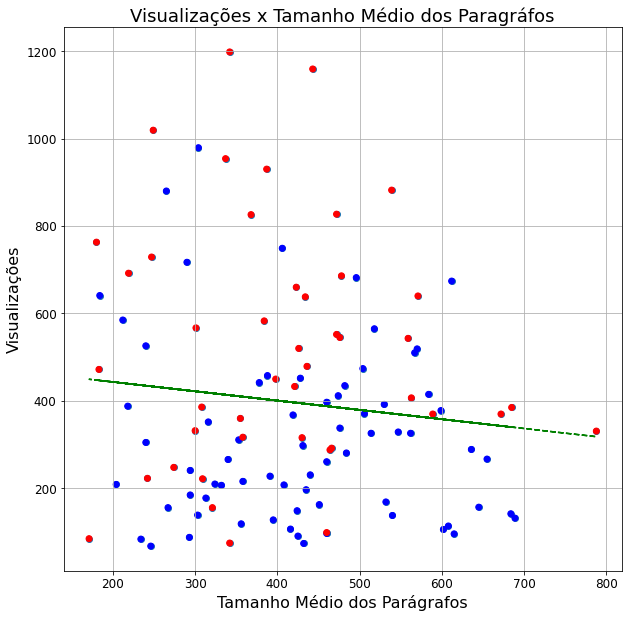

In [26]:
x = df['tamParagraf']
y = df['Visualizações']
plt.scatter(x,y)
plt.title('Visualizações x Tamanho Médio dos Paragráfos')
plt.xlabel('Tamanho Médio dos Parágrafos')
plt.ylabel('Visualizações')
cols=colorRedBlue(df['Pergunta'])
plt.scatter(x=x,y=y,c=cols)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"g--")
plt.grid()
plt.show()

In [27]:
df = pd.get_dummies(df,prefix=['categoria','área'],prefix_sep='-',columns=['Categoria','Área'])

Correlação entre número de palavras e tamanho do título: 0.06300429330822939
Visualizações                         1.000000
Dias                                  0.546314
Pergunta                              0.395355
área-Física                           0.222138
categoria-Você disse ciência?         0.214968
área-Astronomia                       0.168956
Mídia                                 0.111849
área-Medicina                         0.095547
Siglas                                0.094106
Analogias                             0.086612
categoria-O que que a ciência tem?    0.086537
área-Psicologia                       0.084055
categoria-Ciência ao redor            0.082365
Complexidade                          0.073480
Links I.                              0.062110
Interação                             0.044609
área-Química                          0.026297
categoria-Ciência Pop                 0.023102
numPar                                0.021720
área-Tecnologia               

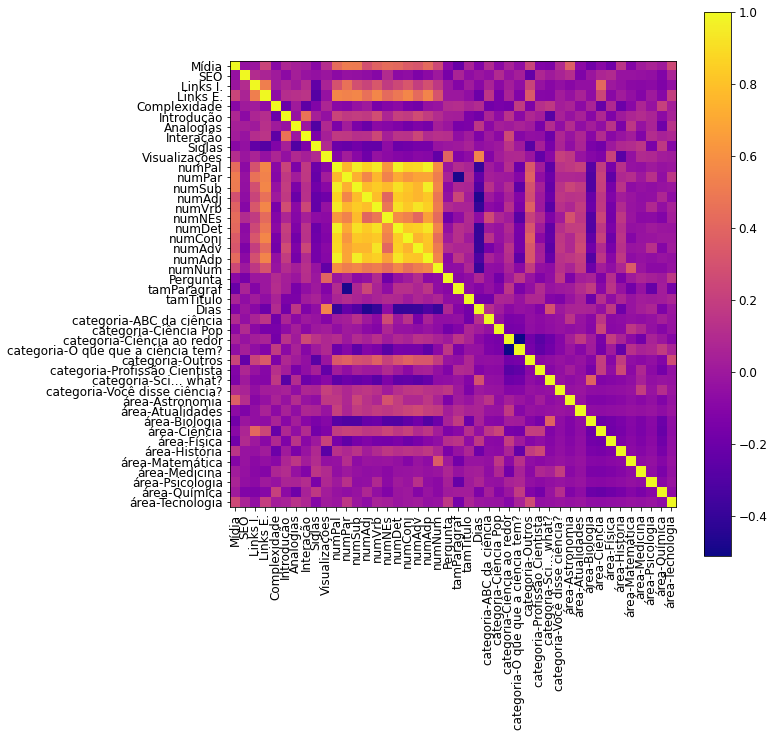

In [28]:
corr = df.corr()
print("Correlação entre número de palavras e tamanho do título:", corr['numPal']['tamTitulo'])
print(corr['Visualizações'].sort_values(ascending=False))
plt.imshow(corr, cmap='plasma', interpolation='none')  
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)  
plt.yticks(range(len(corr)), corr.columns);  
plt.savefig("correl.png")
plt.show()

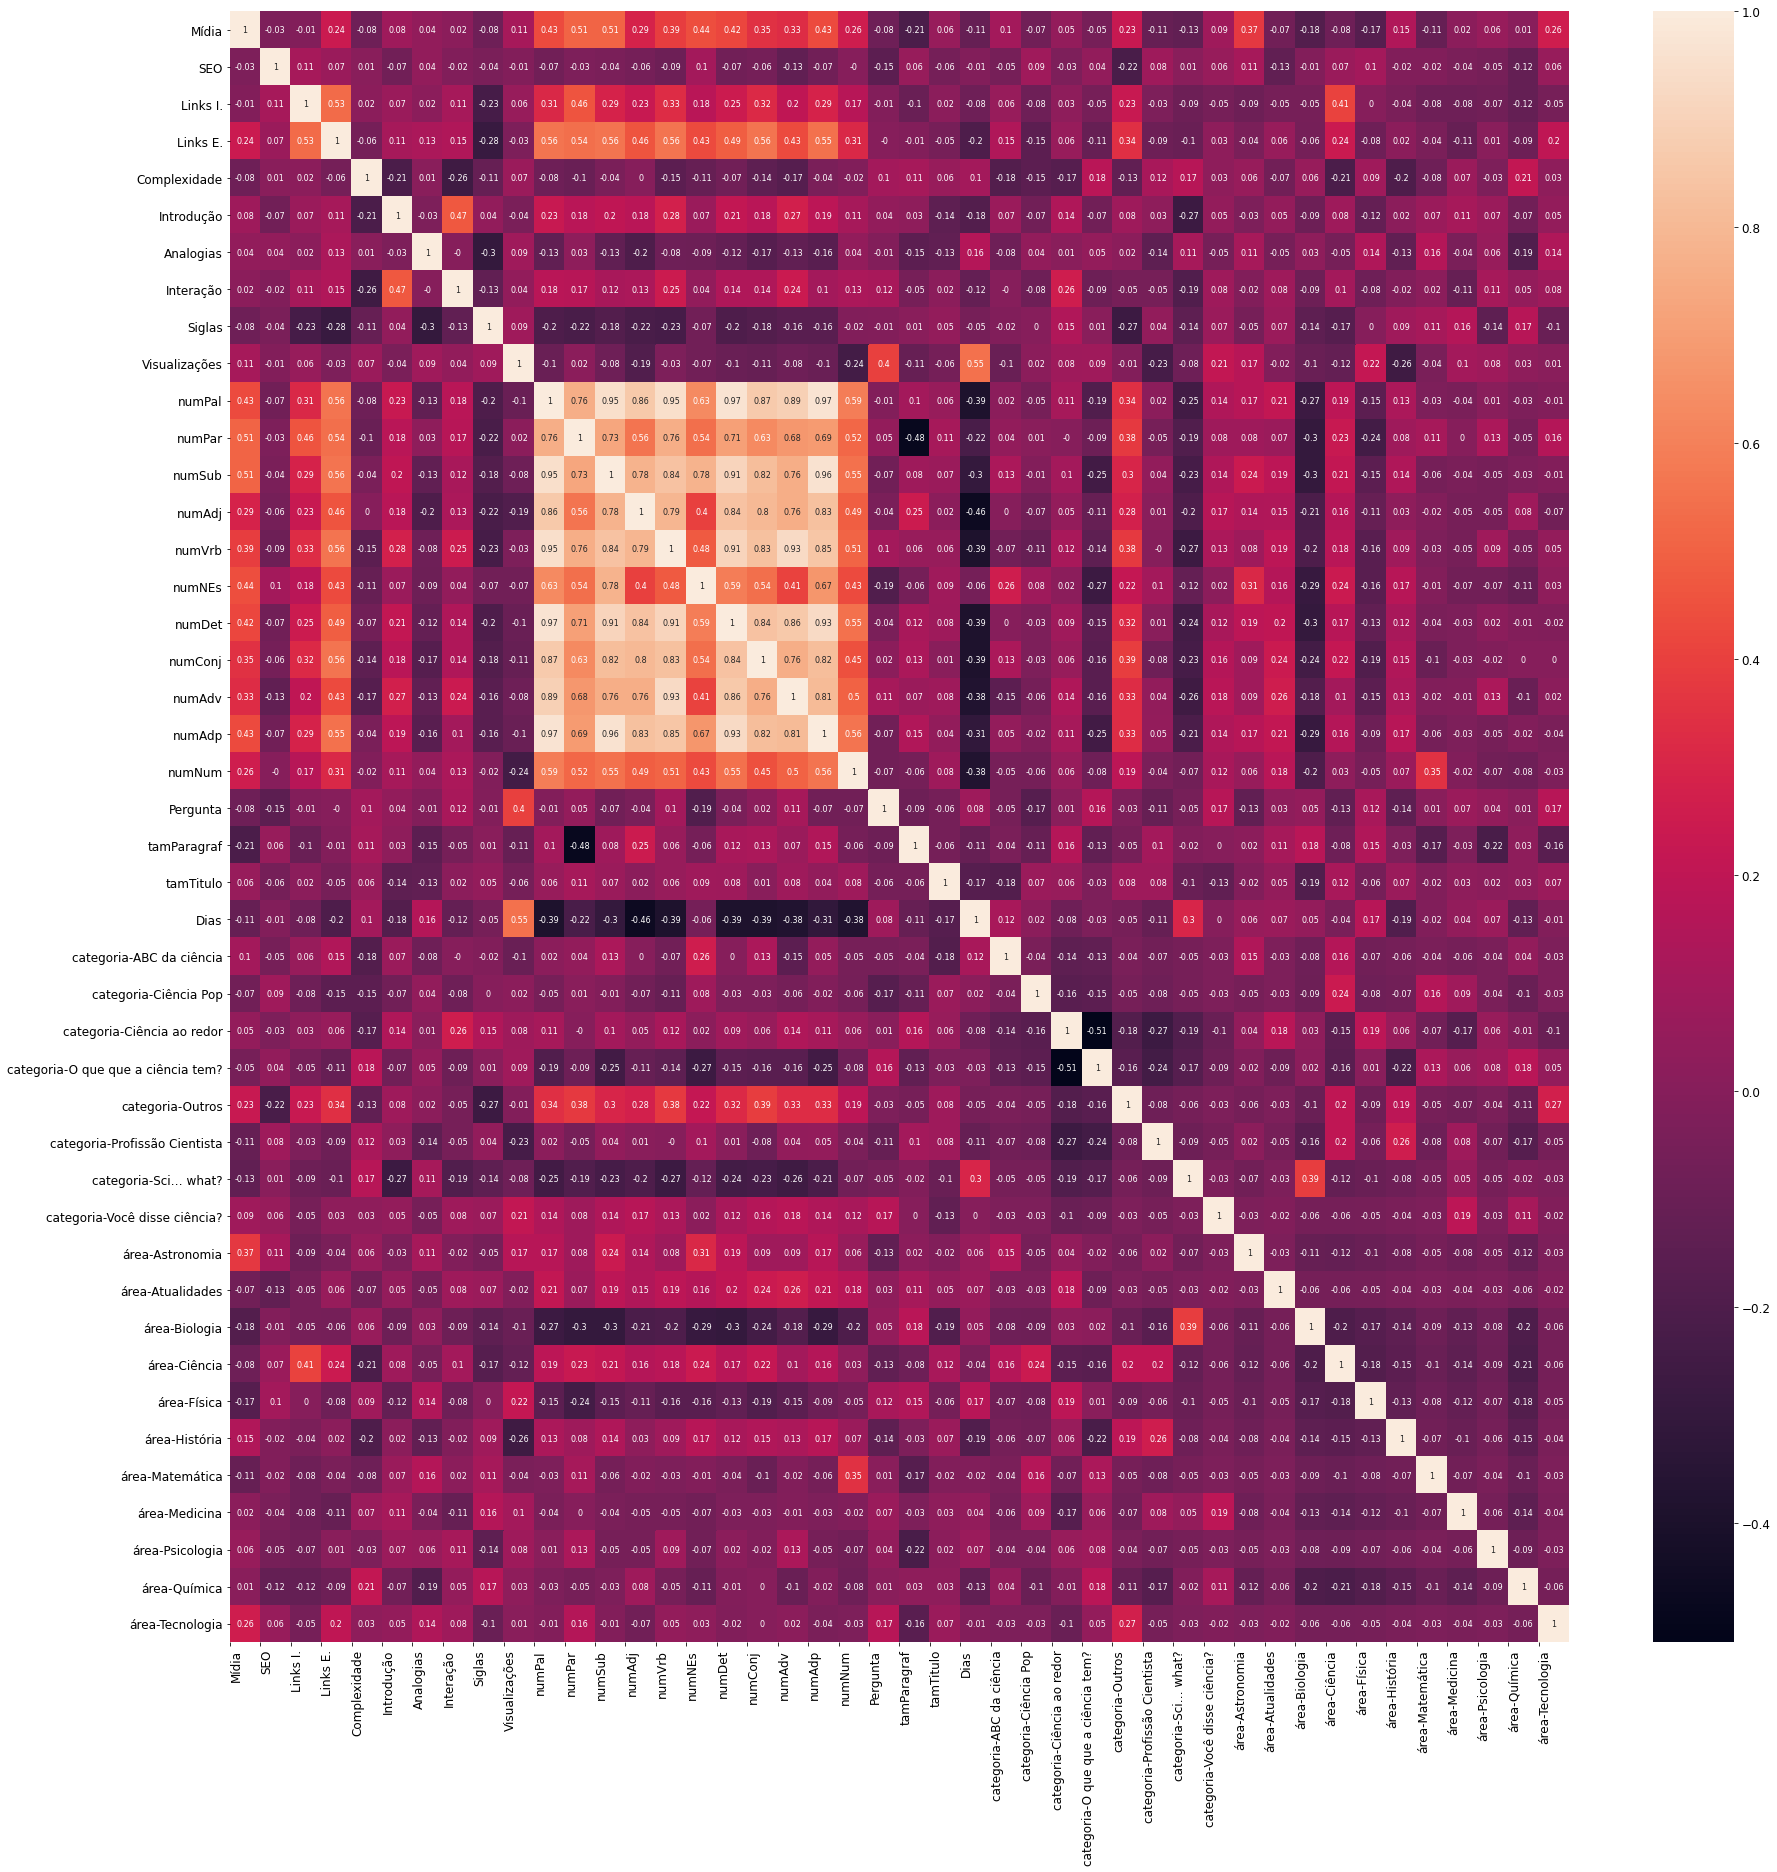

In [29]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(round(corr,2), annot=True, annot_kws={'fontsize':8})
kwargs = {'ha':'left'};
plt.xticks(range(len(corr)), corr.columns, rotation=90, **kwargs);

In [30]:
y = df.pop('Visualizações')
print(y.head())
x = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
print(x.head())
df.to_excel(r'C:\Users\Acer\Dropbox\UFABC\PGC\dataset-pgc-processed.xlsx', index = False)

0    386
1    209
2    763
3    326
4    266
Name: Visualizações, dtype: int64
      Mídia       SEO  Links I.  Links E.  Complexidade  Introdução  \
0 -0.502990 -2.309401 -0.352154 -0.622700     -1.304985    0.342997   
1  0.304628  0.433013 -0.352154 -0.506896     -1.304985    0.342997   
2  4.342715  0.433013 -0.352154  2.388201      0.228709    0.342997   
3 -0.502990  0.433013 -0.352154 -0.506896      0.228709    0.342997   
4 -0.502990  0.433013 -0.352154 -0.854307      1.762403   -2.915476   

   Analogias  Interação    Siglas    numPal    numPar    numSub    numAdj  \
0  -0.404061   0.570597  0.502740 -1.071791 -0.621779 -0.799781 -0.876618   
1  -0.404061   0.570597 -1.989101 -0.512808  0.696290 -0.001466 -0.583801   
2   2.474874   0.570597 -1.989101  0.626083  2.893072  0.917526 -0.374645   
3   2.474874   0.570597 -1.989101 -1.140543 -1.061136 -0.957588 -1.294929   
4  -0.404061  -1.752549  0.502740 -0.438078 -0.035971  0.035665 -0.458307   

     numVrb    numNEs    numDet

In [31]:
x_minmax = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
print(x_minmax.head())

      Mídia  SEO  Links I.  Links E.  Complexidade  Introdução  Analogias  \
0  0.000000  0.0       0.0  0.036364           0.0         1.0        0.0   
1  0.166667  1.0       0.0  0.054545           0.0         1.0        0.0   
2  1.000000  1.0       0.0  0.509091           0.5         1.0        1.0   
3  0.000000  1.0       0.0  0.054545           0.5         1.0        1.0   
4  0.000000  1.0       0.0  0.000000           1.0         0.0        0.0   

   Interação  Siglas    numPal  numPar    numSub    numAdj    numVrb  \
0        1.0     1.0  0.091377   0.075  0.123552  0.144144  0.064639   
1        1.0     0.0  0.211712   0.300  0.289575  0.207207  0.136882   
2        1.0     0.0  0.456885   0.675  0.480695  0.252252  0.486692   
3        1.0     0.0  0.076577   0.000  0.090734  0.054054  0.072243   
4        0.0     1.0  0.227799   0.175  0.297297  0.234234  0.117871   

     numNEs    numDet   numConj    numAdv    numAdp    numNum  Pergunta  \
0  0.165414  0.079545  0.0972

In [32]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(x_minmax, title='Relatório PGC Scaller - Pandas Profiling', html={'style':{'full_width':True}})
#profile.to_file(output_file="Relatorio_PGC_Scaller.html")

In [33]:
dados = [('Dataframe Completo',df),('MimMaxScaller',x_minmax),('StandardScaller',x)]
melhores_metodos = []

In [34]:
def testMethod(X, method):
    lista_MSE = []
    lista_R2 = []
    t=time.perf_counter()

    for i in range (100):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        reg = method
        reg.fit(x_train, y_train)
        y_pred = reg.predict(x_test)
        lista_MSE.append(mean_squared_error(y_test, y_pred))
        lista_R2.append(r2_score(y_test, y_pred))
        
    pred = reg.predict(X)
    #print("MSE médio: ", np.median(lista_MSE))
    #print("R2 médio: ", np.median(lista_R2))
    if np.median(lista_R2) > maior[0]:
            maior[0] = np.median(lista_R2)
            maior[1] = X.shape[1]
            maior[2] = np.median(lista_MSE)
            maior[3] = reg
    #print(round(time.perf_counter()-t,3), "segundos")

In [35]:
def testGrid(reg, param, dados):
    x_train, x_test, y_train, y_test = train_test_split(dados, y, test_size=0.25)
    gs = GridSearchCV(reg, parameters)
    gs.fit(x_train, y_train)
    y_pred = gs.predict(x_test)
    print(gs.best_estimator_)
    return gs.best_estimator_

In [36]:
def testPCA(method):
    for i in range (2,dado[1].shape[1]):
        #print("\nPCA:",i)
        dadosPCA = PCA(n_components=i).fit_transform(dado[1])
        #print(dadosPCA[0:5])
        #if i == 2:
        #    df_PCA2 = pd.DataFrame(dadosPCA)
        #    showPCA2(df_PCA2[0],df_PCA2[1])
        testMethod(dadosPCA,method)

    #print("\nNO PCA")
    testMethod(dado[1],method)
    print("\n")

In [37]:
def showPCA2(x,y):
    plt.scatter(x,y)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"g--")
    plt.show()

Random Forest

In [38]:
parameters = {#'max_depth':[5, 10, 15, 20, 25, 30, 35], 
              'n_estimators':[10, 50, 100, 150, 200, 250, 300], 
              #'min_samples_split':[2, 5, 10, 20],
              'min_samples_leaf':[1, 5, 10, 15, 20]}

regressor = RandomForestRegressor()

maior = [-1,0,0,regressor]
for dado in dados:
    print(dado[0])
    testPCA(testGrid(regressor,parameters,dado[1]))
    print(f"Melhor desempenho:\nR2 score: {maior[0]}\nMSE: {maior[2]}\nPCA: {maior[1]}\n")
    maior[0] = -1
    maior[1] = 0
    maior[2] = 0
    if dado[0] == 'Dataframe Completo':
        melhores_metodos.append(maior[3])

Dataframe Completo
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


Melhor desempenho:
R2 score: 0.3779862684758837
MSE: 43085.28178686126
PCA: 8

MimMaxScaller
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimat

SVR linear

In [39]:
parameters = {'epsilon':[0.05, 0.1, 0.15, 0.2, 0.25]}

regressor = SVR(kernel='linear')
maior = [-1,0,0,regressor]
for dado in dados:
    print(dado[0])
    testPCA(testGrid(regressor,parameters,dado[1]))
    print(f"Melhor desempenho:\nR2 score: {maior[0]}\nMSE: {maior[2]}\nPCA: {maior[1]}\n")
    maior[0] = -1
    maior[1] = 0
    maior[2] = 0
    if dado[0] == 'Dataframe Completo':
        melhores_metodos.append(maior[3])

Dataframe Completo
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Melhor desempenho:
R2 score: 0.44001582636924774
MSE: 35849.22530101707
PCA: 37

MimMaxScaller
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Melhor desempenho:
R2 score: 0.03983457966797388
MSE: 79454.46031823516
PCA: 17

StandardScaller
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.25, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Melhor desempenho:
R2 score: 0.285036617419009
MSE: 40761.53827498768
PCA: 35



SVR rbf

In [40]:
parameters = {'epsilon':[0.05, 0.1, 0.15, 0.2, 0.25]}

regressor = SVR(kernel='rbf')
maior = [-1,0,0,regressor]
for dado in dados:
    print(dado[0])
    testPCA(testGrid(regressor,parameters,dado[1]))
    print(f"Melhor desempenho:\nR2 score: {maior[0]}\nMSE: {maior[2]}\nPCA: {maior[1]}\n")
    maior[0] = -1
    maior[1] = 0
    maior[2] = 0
    if dado[0] == 'Dataframe Completo':
        melhores_metodos.append(maior[3])

Dataframe Completo
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Melhor desempenho:
R2 score: 0.0281878209890436
MSE: 29836.734673925825
PCA: 40

MimMaxScaller
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Melhor desempenho:
R2 score: 0.006739317023612079
MSE: 58492.52401060365
PCA: 40

StandardScaller
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.25, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Melhor desempenho:
R2 score: 0.009611187838771018
MSE: 23558.50703680606
PCA: 5



SVR sigmoid

In [41]:
parameters = {'epsilon':[0.05, 0.1, 0.15, 0.2, 0.25]}

regressor = SVR(kernel='sigmoid')
maior = [-1,0,0,regressor]
for dado in dados:
    print(dado[0])
    testPCA(testGrid(regressor,parameters,dado[1]))
    print(f"Melhor desempenho:\nR2 score: {maior[0]}\nMSE: {maior[2]}\nPCA: {maior[1]}\n")
    maior[0] = -1
    maior[1] = 0
    maior[2] = 0
    if dado[0] == 'Dataframe Completo':
        melhores_metodos.append(maior[3])

Dataframe Completo
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma='scale',
    kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Melhor desempenho:
R2 score: 0.05237705418003957
MSE: 27423.07451019434
PCA: 32

MimMaxScaller
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma='scale',
    kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Melhor desempenho:
R2 score: 0.014164616026244747
MSE: 45497.70259874607
PCA: 32

StandardScaller
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.15, gamma='scale',
    kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Melhor desempenho:
R2 score: 0.013585018914238134
MSE: 61981.006487488296
PCA: 8



Regressão Linear

In [42]:
parameters = {'normalize':[False, True]}

regressor = LinearRegression()
maior = [-1,0,0,regressor]
for dado in dados:
    print(dado[0])
    testPCA(testGrid(regressor,parameters,dado[1]))
    print(f"Melhor desempenho:\nR2 score: {maior[0]}\nMSE: {maior[2]}\nPCA: {maior[1]}\n")
    maior[0] = -1
    maior[1] = 0
    maior[2] = 0
    if dado[0] == 'Dataframe Completo':
        melhores_metodos.append(maior[3])

Dataframe Completo
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


Melhor desempenho:
R2 score: 0.5487085301582332
MSE: 31998.358572176294
PCA: 33

MimMaxScaller
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


Melhor desempenho:
R2 score: 0.6058728964343134
MSE: 22211.30801372702
PCA: 23

StandardScaller
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


Melhor desempenho:
R2 score: 0.5164552447782831
MSE: 29545.081312974977
PCA: 22



MLP

In [43]:
parameters = {'hidden_layer_sizes':[10, 20, 50, 100, 150, 200, 250, 300],
             #'activation':['identity','logistic','tanh','relu'],
             'solver':['lbfgs','sgd','adam'],
             'learning_rate':['constant','invscaling','adaptive']}

regressor = MLPRegressor()
maior = [-1,0,0,regressor]
for dado in dados[:-1]:
    print(dado[0])
    testPCA(testGrid(regressor,parameters,dado[1]))
    print(f"Melhor desempenho:\nR2 score: {maior[0]}\nMSE: {maior[2]}\nPCA: {maior[1]}\n")
    maior[0] = -1
    maior[1] = 0
    maior[2] = 0
    if dado[0] == 'Dataframe Completo':
        melhores_metodos.append(maior[3])

Dataframe Completo
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=250, learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)


Melhor desempenho:
R2 score: 0.49351869871774534
MSE: 31907.19459315303
PCA: 23

MimMaxScaller
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=200, learning_rate='invscaling',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0

KNN

In [44]:
parameters = {'n_neighbors':[1, 3, 5, 15, 25, 35, 45, 55],
             'weights':['uniform','distance'],
             'algorithm':['auto','ball_tree','kd_tree','brute']}

regressor = KNeighborsRegressor()
maior = [-1,0,0,regressor]
for dado in dados:
    print(dado[0])
    testPCA(testGrid(regressor,parameters,dado[1]))
    print(f"Melhor desempenho:\nR2 score: {maior[0]}\nMSE: {maior[2]}\nPCA: {maior[1]}\n")
    maior[0] = -1
    maior[1] = 0
    maior[2] = 0
    if dado[0] == 'Dataframe Completo':
        melhores_metodos.append(maior[3])

Dataframe Completo
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


Melhor desempenho:
R2 score: 0.4938807164699123
MSE: 22407.329370556057
PCA: 14

MimMaxScaller
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                    weights='distance')


Melhor desempenho:
R2 score: 0.26722870059937276
MSE: 38848.822779020615
PCA: 30

StandardScaller
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')


Melhor desempenho:
R2 score: 0.341345113487731
MSE: 30654.418697318
PCA: 24



In [53]:
#melhores_metodos = [RandomForestRegressor, SVR Linear, SVR RBF, SVR Sigmoid, 
#                    LinearRegression, MLPRegressor, KNeighborsRegressor]
num = 6
predictions = []
for metodo in melhores_metodos:
    predictions.append(metodo.predict(df))
print(melhores_metodos[num])
i = 0
for view in y:
    print("Predict:",int(round(predictions[num][i])),"\tReal:",view)
    i=i+1
r2_score(y, predictions[num])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')
Predict: 604 	Real: 386
Predict: 209 	Real: 209
Predict: 548 	Real: 763
Predict: 479 	Real: 326
Predict: 266 	Real: 266
Predict: 207 	Real: 207
Predict: 439 	Real: 827
Predict: 583 	Real: 583
Predict: 474 	Real: 686
Predict: 442 	Real: 442
Predict: 880 	Real: 880
Predict: 954 	Real: 954
Predict: 231 	Real: 231
Predict: 406 	Real: 392
Predict: 1198 	Real: 1198
Predict: 288 	Real: 288
Predict: 522 	Real: 692
Predict: 565 	Real: 565
Predict: 490 	Real: 178
Predict: 407 	Real: 407
Predict: 729 	Real: 729
Predict: 567 	Real: 567
Predict: 401 	Real: 882
Predict: 415 	Real: 415
Predict: 360 	Real: 360
Predict: 163 	Real: 163
Predict: 1019 	Real: 1019
Predict: 371 	Real: 371
Predict: 508 	Real: 368
Predict: 930 	Real: 930
Predict: 479 	Real: 479
Predict: 585 	Real: 585
Predict: 979 	Real: 979
Predict: 674 	Real

0.8357130987710897

In [46]:
total = round(time.perf_counter()-t_total,3)
print(total, "segundos")
print(total/60, "minutos")

512.584 segundos
8.543066666666666 minutos
